In [5]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
text1 = "The commercial investement is far more rewarding"
blob1 = TextBlob(text1)

In [3]:
blob1.sentiment

Sentiment(polarity=0.275, subjectivity=0.625)

In [4]:
text2 = "The flight was pleasant"
blob2 = TextBlob(text2)

In [5]:
blob2.sentiment

Sentiment(polarity=0.7333333333333333, subjectivity=0.9666666666666667)

In [7]:
text3 = "I am fed up of my boss"
blob3 = TextBlob(text3)

In [8]:
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
## polarity indicates how positive or negative the comment is
## value of polarity ranges from -1 to 1 
## -1 indicates  the sentiment to be not good
## +1 indicates the sentiment to be good

In [ ]:
# value of subjectivity relates to whether it is a public opinion or a factual information 
## range is from 0 to 1 

In [ ]:
from textblob import TextBlob
amazon = pd.read_csv(r"C:\Users\KIIT\Dropbox\My PC (BT1000100795)\Downloads\amazonreviews.tsv" , sep = '\t')

In [10]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [11]:
amazon.shape

(10000, 2)

In [12]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [14]:
polarity_score = []
for i in range(0,amazon.shape[0] ):
    score = TextBlob(amazon.iloc[i][1])
    score1 = score.sentiment[0]
    polarity_score.append(score1)

In [25]:
amazon = pd.concat([amazon, pd.Series(polarity_score)] , axis =1 )

## to the polarity_score column to the original DataFrame

In [15]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [1]:
amazon.rename(columns={amazon.columns[2] :"Sentiment"}, inplace = True )

NameError: name 'amazon' is not defined

In [26]:
amazon.head(30)

,label,review,0
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802
5,pos,an absolute masterpiece: I am quite sure any o...,0.296599
6,neg,"Buyer beware: This is a self-published book, a...",0.042708
7,pos,Glorious story: I loved Whisper of the wicked ...,0.503333
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,0.075000
9,pos,Whispers of the Wicked Saints: This was a easy...,0.216667


In [9]:
pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


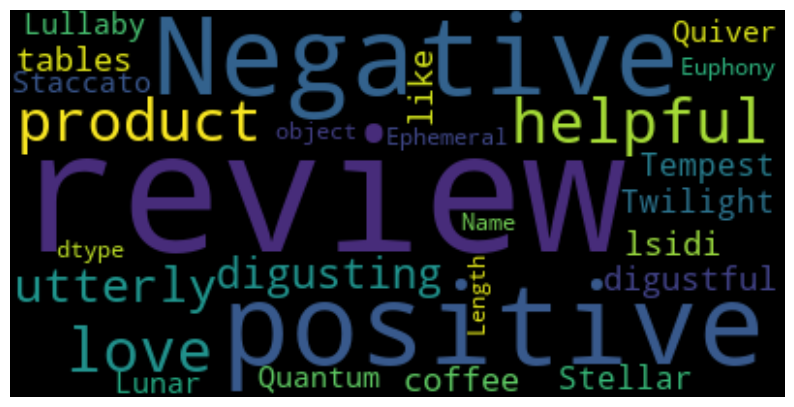

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')

data = {'review': ["This is a positive review.", "Negative reviews are not helpful.", "I love this product." , "utterly digusting and digustful." , "like these coffee tables and we have the lsiding tables here", "Blue Orchid", "Solar Flare", "Midnight Mirage", "Thunderstruck", "Velvet Whisper", "Eternal Eclipse", "Crimson Serenade", "Mystic Echo", "Silver Cascade", "Emerald Enigma", "Infinite Horizon", "Dusk Mirage", "Azure Echo", "Whispering Willow", "Sapphire Symphony", "Amber Aurora", "Moonlit Melody", "Enchanted Lullaby", "Vivid Vortex", "Celestial Harmony", "Obsidian Odyssey", "Harmonic Haze", "Silken Synchrony", "Jade Jubilee", "Astral Cascade", "Twilight Tranquility", "Serendipity Starlight", "Quicksilver Quasar", "Lunar Lullaby", "Cosmic Cadence", "Whimsical Wavelength", "Galactic Gossamer", "Echoing Enigma", "Stellar Serenity", "Velvet Voyager", "Ripple Radiance", "Cerulean Cipher", "Ephemeral Essence", "Radiant Rhapsody", "Abyssal Aura", "Mystical Mosaic", "Crimson Cascade", "Opulent Odyssey", "Luminescent Labyrinth", "Quantum Quasar", "Dreamweaver's Delight", "Celestial Cipher", "Azure Aria", "Eternal Echo", "Astral Aurora", "Emerald Elegance", "Moonlit Mirage", "Sapphire Synthesis", "Cascading Cosmos", "Velvet Vortex", "Quicksilver Quiver", "Midnight Mosaic", "Lunar Luminescence", "Crimson Celestial", "Whispering Wave", "Radiant Rapture", "Harmony Haze", "Ephemeral Eon", "Jade Jamboree", "Silver Serenade", "Abyssal Amplitude", "Twilight Tapestry", "Stellar Symphony", "Surreal Serenity", "Luminous Lullaby", "Cosmic Cadence", "Enchanted Ether", "Infinite Illusion", "Serendipity Soiree", "Velvet Vortex", "Cerulean Cascade", "Opulent Overture", "Mystic Melody", "Quantum Quandary", "Celestial Carousel", "Eternal Embrace", "Astral Amalgam", "Azure Abyss", "Whimsical Whirlwind", "Mystical Maelstrom", "Radiant Reverie", "Sapphire Sonata", "Moonlit Minuet", "Crimson Crescendo", "Velvet Vibrato", "Jade Jive", "Silver Serendipity", "Abyssal Allegro", "Twilight Tempest", "Stellar Staccato", "Quantum Quiver", "Lunar Lullaby", "Ephemeral Euphony"
]}
df = pd.DataFrame(data)

cloud = WordCloud(max_words=1000, stopwords=stopwords.words("english")).generate(str(df['review']))

plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
